In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#importation des données 
df = pd.read_csv("data/users.csv")

In [3]:
df.isnull().sum().sum()


1211192

In [4]:
df.describe()

,user_id,n_tweets,n_replies,n_quotes,n_retweets,max_followers,n_mentions,n_hashtags,n_urls,n_out_urls,f_tweets,f_friends,time_active
count,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,6.322470e+05
mean,2.276477e+17,2.479062e+00,5.499667e-02,3.577173e-01,1.625895e+00,3.602963e+03,2.130552e+00,4.103658e+00,6.562013e-01,1.326787e-01,5.068855e+01,4.204947e-01,3.117694e+01
std,3.886710e+17,9.279491e+00,1.340957e+00,2.444603e+00,7.259032e+00,1.185683e+05,9.805165e+00,2.469455e+01,5.389549e+00,2.256576e+00,8.021183e+03,4.208646e+01,2.563805e+01
min,4.180000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.152339e-02,0.000000e+00,2.777778e-07
25%,3.033891e+08,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.040000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.152339e-02,0.000000e+00,4.933351e+00
50%,1.460774e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.980000e+02,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.152339e-02,0.000000e+00,2.672539e+01
75%,7.125350e+17,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.540000e+02,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,8.333236e-02,0.000000e+00,5.080929e+01
max,1.008393e+18,7.143000e+03,9.680000e+02,1.989000e+03,7.143000e+03,4.220341e+07,9.041000e+03,2.197200e+04,2.670000e+03,1.368000e+03,7.200000e+06,3.115197e+04,8.675018e+01


NaN values in the dataset (time_active only). 2 options : delete row with NaN values or remplace NaN value by mean. 

In [5]:
#Delete NaN values and remove user_id column
#df_clean = df.dropna().drop("user_id", axis=1)
df_filled = df.fillna(df.mean(numeric_only=True)).drop("user_id", axis=1)

In [6]:
#Centrer Réduire les données 
sc = StandardScaler()
users_cr = sc.fit_transform(df_filled.values)

In [7]:
#Réalisation de l'ACP
pca = PCA()
principal_components = pca.fit_transform(users_cr)
n = (pca.n_components_)
print(n)

12


    Val.Propre    Seuils
0     4.584046  3.103211
1     1.248584  2.103211
2     1.018444  1.603211
3     1.000126  1.269877
4     0.997939  1.019877
5     0.961193  0.819877
6     0.903590  0.653211
7     0.674817  0.510354
8     0.431897  0.385354
9     0.089893  0.274242
10    0.059429  0.174242
11    0.030048  0.083333


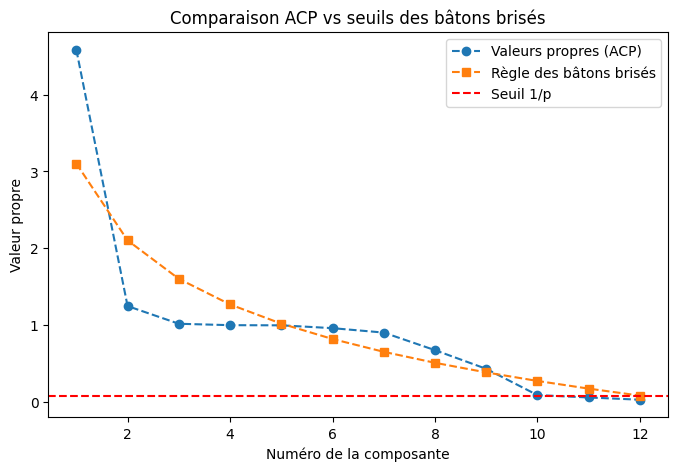

In [8]:
# Extraction des valeurs propres
valeurs_propres = pca.explained_variance_
n = len(valeurs_propres)  # Nombre de variables initiales

# 🔹 Calcul des seuils de la règle des bâtons brisés
bk = 1 / np.arange(n, 0, -1)  # Génération de la série inverse (1/n, 1/(n-1), ..., 1/1)
bk = np.cumsum(bk)  # Somme cumulative
bk = bk[::-1]  # Inversion pour correspondre à l'ordre décroissant des valeurs propres

# 🔍 Comparaison entre valeurs propres et seuils
print(pd.DataFrame({'Val.Propre': valeurs_propres, 'Seuils': bk}))

# Affichage des valeurs propres et des valeurs de la règle des bâtons brisés
plt.figure(figsize=(8,5))
plt.plot(range(1, n+1), valeurs_propres, marker='o', linestyle='--', label="Valeurs propres (ACP)")
plt.plot(range(1, n+1), bk, marker='s', linestyle='--', label="Règle des bâtons brisés")
plt.axhline(y=1/n, color='r', linestyle='dashed', label="Seuil 1/p")  # Seuil d'égalité
plt.xlabel("Numéro de la composante")
plt.ylabel("Valeur propre")
plt.title("Comparaison ACP vs seuils des bâtons brisés")
plt.legend()
plt.show()

Use 3 eig for the ACP according to 

In [9]:
# Récupérer les valeurs propres / variance / inertie
# Valeurs propres (Variance des composantes principales)

eig = pca.explained_variance_
print("Valeurs propres:", eig)
eig
#valeurs_propres = Variance estimé avec n-1 degrés de liberté
# La variance est estimée avec n-1 degrés de liberté

# Variance expliquée par chaque composante (ratio)
var_explain = pca.explained_variance_ratio_
print("Variance expliquée (ratio) :", var_explain)

Valeurs propres: [4.58404646 1.24858434 1.01844396 1.00012641 0.99793923 0.96119264
 0.90358956 0.67481705 0.43189694 0.08989325 0.05942878 0.0300479 ]
Variance expliquée (ratio) : [0.38200366 0.10404864 0.08487028 0.08334382 0.08316156 0.08009934
 0.07529909 0.05623472 0.03599139 0.0074911  0.0049524  0.00250399]


In [10]:
# Un ajustement est nécessaire pour avoir la variance avec n degrés de liberté
eigval=eig*(len(users_cr)-1)/len(users_cr)
print(eigval)

[4.58404397 1.24858366 1.01844341 1.00012586 0.99793869 0.96119212
 0.90358907 0.67481668 0.43189671 0.0898932  0.05942874 0.03004788]


In [11]:
# Inertie de chaque axes 
np.set_printoptions(suppress=True)
print(pca.explained_variance_ratio_*100)

[38.20036646 10.40486384  8.48702838  8.33438219  8.31615573  8.00993434
  7.5299089   5.62347234  3.59913925  0.74911002  0.49523953  0.25039902]


In [12]:
vp_mat=pca.components_.T
# On calcule la racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [13]:
# Corrélation des variables avec les axes
corvar = np.zeros((n,n))
for k in range(n):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

# Afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.96566467 -0.08129954 -0.00649233  0.00325929  0.00311984 -0.00575721
   0.01403666 -0.02328777  0.07887988 -0.18315852  0.12864336  0.06106496]
 [ 0.28475393  0.5041692  -0.0874977  -0.01251085 -0.09399026 -0.36993483
   0.68657013 -0.16631442 -0.10004049  0.03231412  0.0307214  -0.01397041]
 [ 0.72488405 -0.13921691  0.1407343  -0.019361    0.00076637  0.13363063
   0.10270497  0.5252341  -0.34638547  0.09525268  0.03707191  0.01654015]
 [ 0.81899743 -0.4763743   0.02322401  0.01766191  0.02259971  0.08236571
   0.0202006  -0.27171033 -0.0509687   0.01552477  0.0380617  -0.12506996]
 [ 0.02883172  0.09656342 -0.33705981  0.00604408  0.91105431  0.18281331
   0.11240368  0.00731625 -0.00814333  0.00172352  0.00034146 -0.00046326]
 [ 0.84895757 -0.36752837  0.00642781  0.01490972  0.00822483  0.01356173
   0.14970677 -0.30040269 -0.05901604  0.03254701 -0.14068742  0.08179068]
 [ 0.80926627  0.08301209  0.05158567 -0.03546754  0.01435674 -0.04319881
   0.04813136  0.21960146  0.517

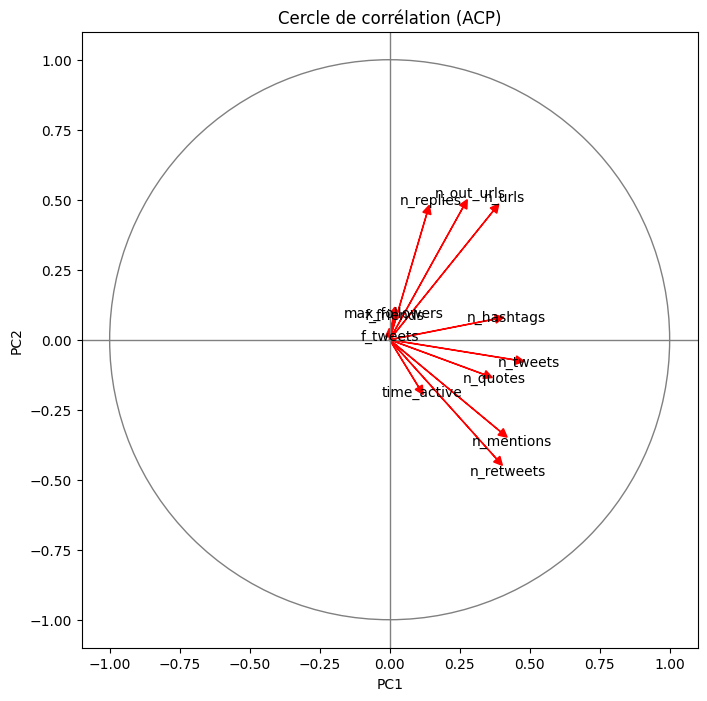

In [14]:
# On prend les 3 premières composantes
pcs = pca.components_[:3, :]
features = df_filled.columns

plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
plt.gca().add_patch(circle)

# Flèches pour chaque variable
for i, feature in enumerate(features):
    x = pcs[0, i]
    y = pcs[1, i]
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(x * 1.1, y * 1.1, feature, color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle de corrélation (ACP)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal')
plt.show()


Good representation : n_retweets, n_mentions, n_quotes, n_tweets, n_hashtags, out_urls (near to border)
Bad representation : ser_id, max_followers, f_tweets, time_active

Correlation : n_mentions and n_retweets -> positively correlated and correlated woth axis 1
n_replies, out_urls, n_url -> positively correlated and correlated with axis 2 
n_replies and n_retweets -> decorrelated

In [15]:
# Cos² = carrés des coordonnées des variables projetées sur les axes
cos2 = pcs**2
cos2_df = pd.DataFrame(cos2.T, index=features, columns=['cos2_PC1', 'cos2_PC2', 'cos2_PC3'])
print(cos2_df)


                   cos2_PC1  cos2_PC2  cos2_PC3
n_tweets       2.034248e-01  0.005294  0.000041
n_replies      1.768849e-02  0.203580  0.007517
n_quotes       1.146274e-01  0.015523  0.019447
n_retweets     1.463242e-01  0.181752  0.000530
max_followers  1.813395e-04  0.007468  0.111552
n_mentions     1.572256e-01  0.108184  0.000041
n_hashtags     1.428677e-01  0.005519  0.002613
n_urls         1.376102e-01  0.212713  0.000014
n_out_urls     6.895524e-02  0.224518  0.008038
f_tweets       1.024108e-07  0.000110  0.137281
f_friends      2.892490e-04  0.006535  0.516360
time_active    1.080562e-02  0.028804  0.196565


If a var is near to 1, they have a good representation. 

In [16]:
# Contribution (%) des variables à chaque axe
contrib = pcs**2
contrib = contrib / contrib.sum(axis=1)[:, np.newaxis]  # Normalisation
contrib = contrib * 100

# Générer dynamiquement les noms de colonnes en fonction du nombre de composantes
n_comp = contrib.shape[0]
col_names = [f'contrib_PC{i+1}' for i in range(n_comp)]

# Créer le DataFrame correctement
contrib_df = pd.DataFrame(contrib.T, index=features, columns=col_names)
print(contrib_df)

               contrib_PC1  contrib_PC2  contrib_PC3
n_tweets         20.342481     0.529369     0.004139
n_replies         1.768849    20.357993     0.751721
n_quotes         11.462737     1.552267     1.944746
n_retweets       14.632425    18.175192     0.052959
max_followers     0.018134     0.746806    11.155192
n_mentions       15.722558    10.818426     0.004057
n_hashtags       14.286772     0.551906     0.261289
n_urls           13.761025    21.271344     0.001437
n_out_urls        6.895524    22.451784     0.803813
f_tweets          0.000010     0.011049    13.728058
f_friends         0.028925     0.653451    51.636040
time_active       1.080562     2.880413    19.656550


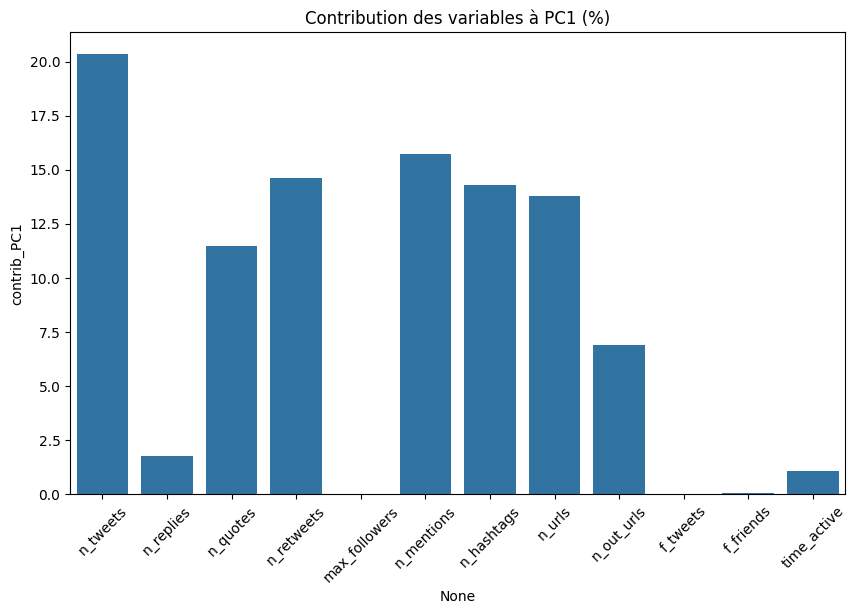

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=contrib_df.index, y=contrib_df['contrib_PC1'])
plt.xticks(rotation=45)
plt.title("Contribution des variables à PC1 (%)")
plt.show()

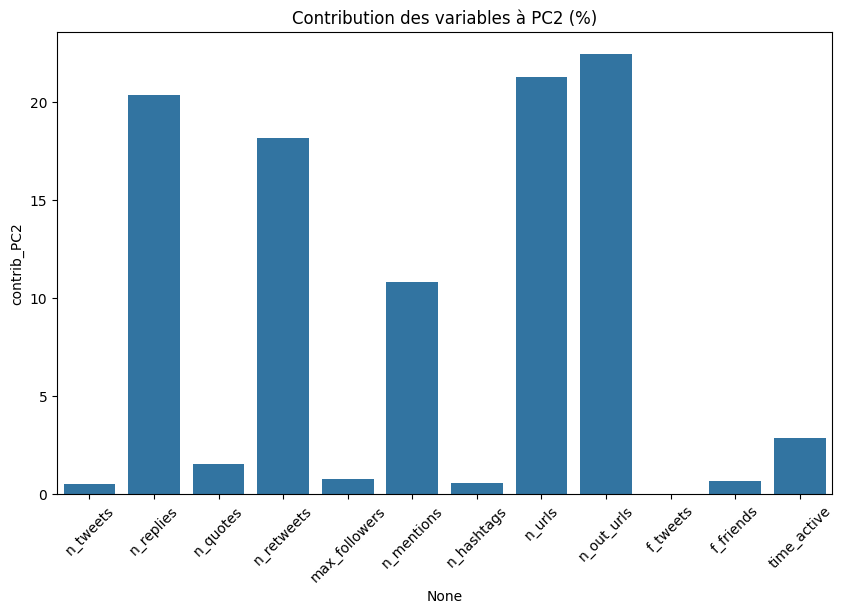

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=contrib_df.index, y=contrib_df['contrib_PC2'])
plt.xticks(rotation=45)
plt.title("Contribution des variables à PC2 (%)")
plt.show()

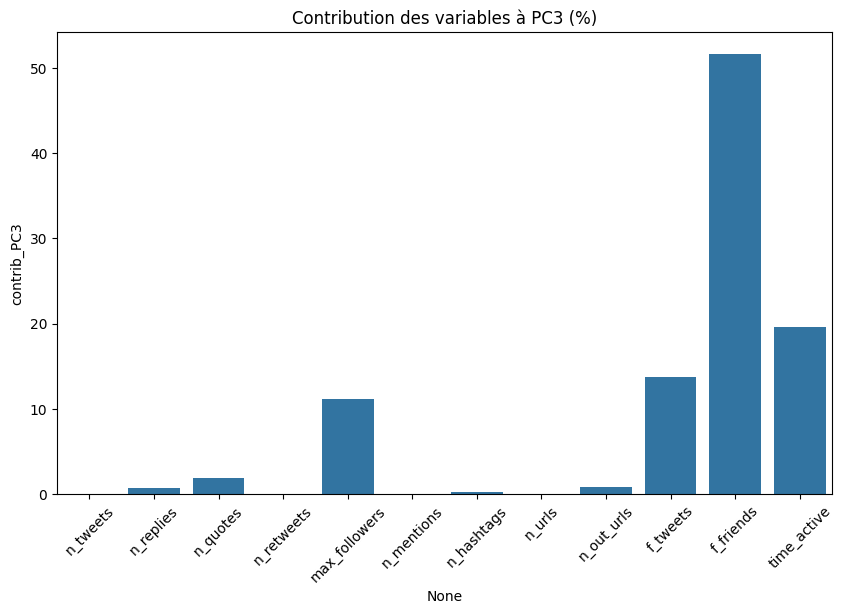

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=contrib_df.index, y=contrib_df['contrib_PC3'])
plt.xticks(rotation=45)
plt.title("Contribution des variables à PC3 (%)")
plt.show()